# Feature Detection

One very common task in mass spectrometry is the detection of
2-dimensional patterns in m/z and time (RT) dimension from a series of
[MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1)
scans. These patterns are called `Features` and they exhibit a
chromatographic elution profile in the time dimension and an isotopic
pattern in the m/z dimension (see [previous section](deisotoping.ipynb)
for the 1-dimensional problem). OpenMS has multiple tools that can
identify these features in 2-dimensional data, these tools are called
[FeatureFinder](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinder.html).
Currently the following FeatureFinders are available in pyOpenMS:

> -   [FeatureFinderMultiplexAlgorithm](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderMultiplexAlgorithm.html)
>     (e.g.,
>     [SILAC](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-SILAC),
>     Dimethyl labeling, (and label-free), identification free feature
>     detection of peptides)
> -   [FeatureFinderAlgorithmPicked](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmPicked.html)
>     (Label-free, identification free feature detection of peptides)
> -   [FeatureFinderIdentificationAlgorithm](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderIdentificationAlgorithm.html)
>     (Label-free identification-guided feature detection of peptides)
> -   [FeatureFinderAlgorithmIsotopeWavelet](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmIsotopeWavelet.html)
>     (old instruments)
> -   [FeatureFindingMetabo](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFindingMetabo.html)
>     (Label-free, identification free feature detection of metabolites)
> -   [FeatureFinderAlgorithmMetaboIdent](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmMetaboIdent.html)
>     (Label-free, identification guided feature detection of
>     metabolites)

All of the algorithms above are for proteomics data with the exception
of
[FeatureFindingMetabo](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFindingMetabo.html)
and
[FeatureFinderMetaboIdentCompound](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderMetaboIdentCompound.html)
for metabolomics data and small molecules in general.

## Proteomics

Two of the most commonly used feature finders for proteomics in OpenMS
are the
[FeatureFinder](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinder.html)
and
[FeatureFinderIdentificationAlgorithm](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderIdentificationAlgorithm.html)
which both work on (high resolution) centroided data. We can use the
following code to find features in MS data:

In [ ]:
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
urlretrieve(
    gh + "/src/data/FeatureFinderCentroided_1_input.mzML", "feature_test.mzML"
)

import pyopenms as oms

# Prepare data loading (save memory by only
# loading MS1 spectra into memory)
options = oms.PeakFileOptions()
options.setMSLevels([1])
fh = oms.MzMLFile()
fh.setOptions(options)

# Load data
input_map = oms.MSExperiment()
fh.load("feature_test.mzML", input_map)
input_map.updateRanges()

ff = oms.FeatureFinder()
ff.setLogType(oms.LogType.CMD)

# Run the feature finder
name = "centroided"
features = oms.FeatureMap()
seeds = oms.FeatureMap()
params = oms.FeatureFinder().getParameters(name)
ff.run(name, input_map, features, params, seeds)

features.setUniqueIds()
fh = oms.FeatureXMLFile()
fh.store("output.featureXML", features)
print("Found", features.size(), "features")

With a few lines of Python, we are able to run powerful algorithms
available in OpenMS. The resulting data is held in memory (a
[FeatureMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureMap.html)
object) and can be inspected directly using the `help(features)`
comment. It reveals that the object supports iteration (through the
`__iter__` function) as well as direct access (through the `__getitem__`
function). This means we write code that uses direct access and
iteration in Python as follows:

In [ ]:
f0 = features[0]
for f in features:
    print(f.getRT(), f.getMZ())

Each entry in the
[FeatureMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureMap.html)
is a so-called
[Feature](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.Feature.html)
and allows direct access to the m/z and RT value from Python. Again, we
can learn this by inspecting `help(f)` or by consulting the manual.

Note: the output file that we have written (`output.featureXML`) is an
OpenMS-internal XML format for storing features. You can learn more
about file formats in the [Reading MS data
formats](other_file_handling.ipynb) section.

## Metabolomics - Untargeted

For the untargeted detection of small molecule features we can use the
[FeatureFindingMetabo](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFindingMetabo.html)
with prior
[MassTraceDetection](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.MassTraceDetection.html)
and
[ElutionPeakDetection](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.ElutionPeakDetection.html).

In [ ]:
import pyopenms as oms
from urllib.request import urlretrieve

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
mzML_path = gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML"
urlretrieve(mzML_path, "ms_data.mzML")

exp = oms.MSExperiment()
oms.MzMLFile().load("ms_data.mzML", exp)

exp.sortSpectra(True)

mass_traces = []
mtd = oms.MassTraceDetection()
mtd_params = mtd.getDefaults()
mtd_params.setValue(
    "mass_error_ppm", 5.0
)  # set according to your instrument mass error
mtd_params.setValue(
    "noise_threshold_int", 3000.0
)  # adjust to noise level in your data
mtd.setParameters(mtd_params)
mtd.run(exp, mass_traces, 0)

mass_traces_split = []
mass_traces_final = []
epd = oms.ElutionPeakDetection()
epd_params = epd.getDefaults()
epd_params.setValue("width_filtering", "fixed")
epd.setParameters(epd_params)
epd.detectPeaks(mass_traces, mass_traces_split)

if epd.getParameters().getValue("width_filtering") == "auto":
    epd.filterByPeakWidth(mass_traces_split, mass_traces_final)
else:
    mass_traces_final = mass_traces_split

fm = oms.FeatureMap()
feat_chrom = []
ffm = oms.FeatureFindingMetabo()
ffm_params = ffm.getDefaults()
ffm_params.setValue("isotope_filtering_model", "none")
ffm_params.setValue(
    "remove_single_traces", "true"
)  # set false to keep features with only one mass trace
ffm_params.setValue("mz_scoring_by_elements", "false")
ffm_params.setValue("report_convex_hulls", "true")
ffm.setParameters(ffm_params)
ffm.run(mass_traces_final, fm, feat_chrom)

fm.setUniqueIds()
fm.setPrimaryMSRunPath(["ms_data.mzML".encode()])

## Metabolomics - Targeted

[FeatureFinderAlgorithmMetaboIdent](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmMetaboIdent.html)
performs
[MS1](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS1)-based
**targeted feature extraction** based on user provided compounds, which
are specified in an assay library (a tab-separated text file). Detected
features are stored in a
[FeatureMap](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureMap.html)
which can be stored in a
[FeatureXMLFile](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureXMLFile.html).
This tool is useful for the targeted extraction of features for a
well-defined set of compounds with known sum formulas and retention
times. For more information on the format of the assay library and
available parameters visit the [FeatureFinderMetaboIdent
documentation](https://abibuilder.cs.uni-tuebingen.de/archive/openms/Documentation/release/latest/html/UTILS_FeatureFinderMetaboIdent.html).

The pyOpenMS
[FeatureFinderAlgorithmMetaboIdent](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmMetaboIdent.html)
needs a list of
[FeatureFinderMetaboIdentCompound](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderMetaboIdentCompound.html)
objects as an assay libray for it's
[FeatureFinderAlgorithmMetaboIdent.run()](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmMetaboIdent.run().html)
function. We could create that list ourselves or use the following
function to read an assay library as `.tsv` file:

| CompoundName        | SumFormula | Mass | Charge | RetentionTime | RetentionTimeRange | IsoDistribution |
|----------------------|--------------|--------|--------|--------|--------|--------|
| 2'-O-methylcytidine | C10H15N3O5 | 0    | 1      | 207.6         | 0                  | 0               |
| 5-formylcytidine    | C10O6N3H13 | 0    | 1      | 269.4         | 0                  | 0               |
| 5-methyluridine     | C10H14N2O6 | 0    | 1      | 291.6         | 0                  | 0               |
| adenosine           | C10H13N5O4 | 0    | 1      | 220.8         | 0                  | 0               |
| deoxyadenosine      | C10H13N5O3 | 0    | 1      | 243.0         | 0                  | 0               |
| inosine             | C10H12N4O5 | 0    | 1      | 264.0         | 0                  | 0               |

Compounds tsv file

In [ ]:
import csv


# read tsv file and create list of FeatureFinderMetaboIdentCompound
def metaboTableFromFile(path_to_library_file):
    metaboTable = []
    with open(path_to_library_file, "r") as tsv_file:
        tsv_reader = csv.reader(tsv_file, delimiter="\t")
        next(tsv_reader)  # skip header
        for row in tsv_reader:
            metaboTable.append(
                oms.FeatureFinderMetaboIdentCompound(
                    row[0],  # name
                    row[1],  # sum formula
                    float(row[2]),  # mass
                    [int(charge) for charge in row[3].split(",")],  # charges
                    [float(rt) for rt in row[4].split(",")],  # RTs
                    [
                        float(rt_range) for rt_range in row[5].split(",")
                    ],  # RT ranges
                    [
                        float(iso_distrib) for iso_distrib in row[6].split(",")
                    ],  # isotope distributions
                )
            )
    return metaboTable

Now we can use the following code to detect features with
[FeatureFinderAlgorithmMetaboIdent](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureFinderAlgorithmMetaboIdent.html)
and store them in a
[FeatureXMLFile](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.FeatureXMLFile.html):

In [ ]:
from urllib.request import urlretrieve
import pyopenms as oms

gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-docs/master"
mzML_path = gh + "/src/data/FeatureFinderMetaboIdent_1_input.mzML"
urlretrieve(mzML_path, "ms_data.mzML")
urlretrieve(
    gh + "/src/data/FeatureFinderMetaboIdent_1_input.tsv", "library.tsv"
)

# load ms data from mzML file into MSExperiment
spectra = oms.MSExperiment()
oms.MzMLFile().load("ms_data.mzML", spectra)

# create FeatureFinderAlgorithmMetaboIdent and assign ms data
ff = oms.FeatureFinderAlgorithmMetaboIdent()
ff.setMSData(spectra)

# read library generate a metabo table with compounds
metabo_table = metaboTableFromFile("library.tsv")

# FeatureMap to store results
fm = oms.FeatureMap()

# edit some parameters
params = ff.getParameters()
params[b"extract:mz_window"] = 5.0  # 5 ppm
params[b"extract:rt_window"] = 20.0  # 20 seconds
params[b"detect:peak_width"] = 3.0  # 3 seconds
ff.setParameters(params)

# run the FeatureFinderMetaboIdent with the metabo_table and mzML file path -> store results in fm
ff.run(metabo_table, fm, mzML_path)

# save FeatureMap to file
oms.FeatureXMLFile().store("detected_features.featureXML", fm)

Note: the output file that we have written (`output.featureXML`) is an
OpenMS-internal XML format for storing features. You can learn more
about file formats in the [Reading MS data
formats](other_file_handling.ipynb) section.

We can get a quick overview on the detected features by plotting them
using the following function:

In [ ]:
import matplotlib.pyplot as plt

def plotDetectedFeatures3D(path_to_featureXML):
  fm = oms.FeatureMap()
  fh = oms.FeatureXMLFile()
  fh.load(path_to_featureXML, fm)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection="3d")

  for feature in fm:
      color = next(ax._get_lines.prop_cycler)["color"]
      # chromatogram data is stored in the subordinates of the feature
      for i, sub in enumerate(feature.getSubordinates()):
          retention_times = [
              x[0] for x in sub.getConvexHulls()[0].getHullPoints()
          ]
          intensities = [
              int(y[1]) for y in sub.getConvexHulls()[0].getHullPoints()
          ]
          mz = sub.getMetaValue("MZ")
          ax.plot(retention_times, intensities, zs=mz, zdir="x", color=color)
          if i == 0:
              ax.text(
                  mz,
                  retention_times[0],
                  max(intensities) * 1.02,
                  feature.getMetaValue("label"),
                  color=color,
              )

  ax.set_ylabel("time (s)")
  ax.set_xlabel("m/z")
  ax.set_zlabel("intensity (cps)")
  plt.show()

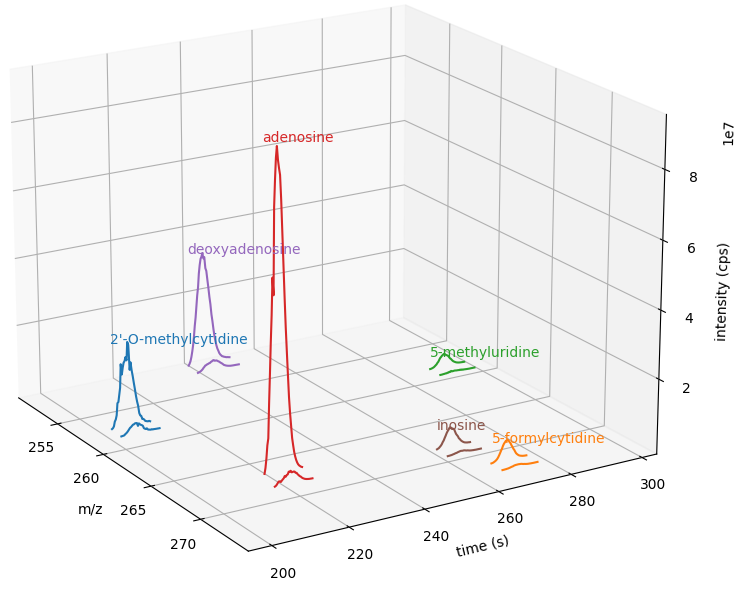